# Scattering and Absorption Computation for Fractal Aggregates

### Generation of the Aggregate: Diffusion Limited Aggregation

In [49]:
import dla

In [50]:
parametersAggregate = {
    "radiusMean": 18,
    "radiusVariance": 0.1,
    "Df": 1.8,
    "DfTolerance": 0.05,
    "appearanceFactor": 1.1,
    "movementFactor": 1.5,
    "disappearanceFactor": 1.4,
    "maxParticleGenerationCount" : 5000,
    "maxMovementGenerationCount":5000,
    "particlesToAdd":24,
    "collisionTol":1e-5
}

In [51]:
dlaAggregate = dla.DLA(parameters = parametersAggregate)

In [52]:
aggregate = dlaAggregate.getAggregate()

In [53]:
print(aggregate)

Aggregate info: 
# Particles:24
Particles: 
[[ 18.02394161   8.16758732  28.0771137   -6.18810258]
 [ 17.9248898   28.74981763  10.08547793  17.15696193]
 [ 18.08102183   4.09035829  -6.67597078 -15.08576686]
 [ 18.00596876 -22.14298015  -6.46725592   9.69406373]
 [ 17.91262206 -16.18451135  28.24975584 -32.61503605]
 [ 17.99984139 -10.32071168 -38.16768378  -2.62405004]
 [ 18.05561474  36.15486147 -24.40660074  24.23221888]
 [ 17.80354979   9.81566935  53.34001408  19.1630226 ]
 [ 18.19325724  -7.4813152  -47.34877263  32.26988278]
 [ 17.95094906  -2.847213   -29.62972796  63.43019287]
 [ 18.02603318 -19.07624285 -48.49861555 -36.00783176]
 [ 18.02624649  29.48045265  56.187281   -13.61757426]
 [ 17.99792438 -23.13630115  67.33693864  19.16636621]
 [ 17.76641338  15.15633056 -54.95771071 -44.22433673]
 [ 18.16059633  31.77462159  54.68512457 -49.7003767 ]
 [ 17.8069575   26.10181069 -15.01568091  78.49711868]
 [ 18.0758069   31.50161844 -77.21760418 -21.37714483]
 [ 18.11178477 -17.35

In [54]:
aggregate.saveAsText('aggregate.txt')

### 3D visualization of the Aggregate

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [56]:
%matplotlib widget

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
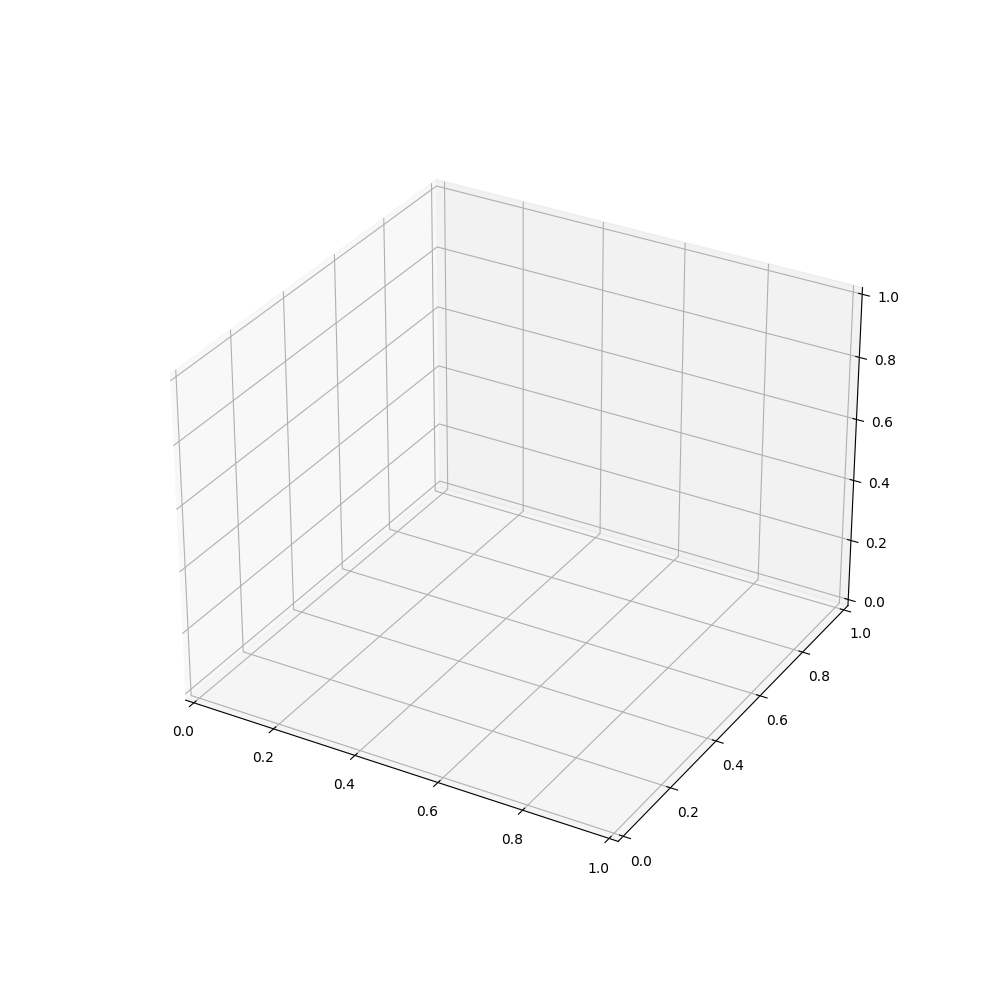

In [57]:
fig = plt.figure(1, figsize = (10,10));
ax = fig.add_subplot(111, projection = '3d');

In [58]:
def plotSphere(xyzr: np.array, detailLevel = 16):
    
    x = xyzr[1]
    y = xyzr[2]
    z = xyzr[3]
    r = xyzr[0]
    
    u = np.linspace(0, 2 * np.pi, detailLevel)
    v = np.linspace(0, np.pi, detailLevel)
    
    X = x + r * np.outer(np.cos(u), np.sin(v))
    Y = y + r * np.outer(np.sin(u), np.sin(v))
    Z = z + r * np.outer(np.ones(np.size(u)), np.cos(v))
    
    return ax.plot_surface(X, Y, Z, cmap = 'hot')

In [59]:
particles = aggregate.getParticles()

In [60]:
np.apply_along_axis(plotSphere, axis = 1, arr = particles);

In [61]:
plt.savefig('aggregate.png', dpi = 300)

### Scattering and Absorption Computation using MSTM (accessed via WSL)

In [74]:
import mstm

In [75]:
import numpy as np
import pandas as pd

In [ ]:
parametersComputation = {
    "refractiveIndexReal": 1,
}

In [62]:
import subprocess

In [71]:
subprocess.check_output(['wsl', 'ls', '-l'])

b'total 948\n-rwxrwxrwx 1 feri feri    638 Oct 19 17:44 Makefile\ndrwxrwxrwx 1 feri feri   4096 Oct 26 15:51 __pycache__\ndrwxrwxrwx 1 feri feri   4096 Oct 25 09:53 _hold\n-rwxrwxrwx 1 feri feri 704076 Oct 26 16:33 aggregate.png\n-rwxrwxrwx 1 feri feri   7951 Oct 24 22:39 aggregate.py\n-rwxrwxrwx 1 feri feri   2463 Oct 26 16:31 aggregate.txt\ndrwxrwxrwx 1 feri feri   4096 Oct 25 09:45 build\n-rwxrwxrwx 1 feri feri   3585 Oct 26 14:41 collision.py\n-rwxrwxrwx 1 feri feri   6848 Oct 24 23:36 dla.py\ndrwxrwxrwx 1 feri feri   4096 Oct 26 15:45 dla_mstm\n-rwxrwxrwx 1 feri feri 164099 Oct 26 18:58 interactiveDla.ipynb\n-rwxrwxrwx 1 feri feri    763 Oct 26 14:43 main.py\n-rwxrwxrwx 1 feri feri    804 Oct 19 17:44 make.bat\ndrwxrwxrwx 1 feri feri   4096 Oct 25 09:58 mstm\n-rwxrwxrwx 1 feri feri   2745 Oct 24 23:41 plot3d.m\n-rwxrwxrwx 1 feri feri    124 Oct 26 15:45 requirements.txt\ndrwxrwxrwx 1 feri feri   4096 Oct 25 09:59 source\n-rwxrwxrwx 1 feri feri   4289 Oct 24 22:02 spherical.py\n-rw

In [67]:
print(subprocess.check_output(['wsl', 'ls']))

b'Makefile\n__pycache__\n_hold\naggregate.png\naggregate.py\naggregate.txt\nbuild\ncollision.py\ndla.py\ndla_mstm\ninteractiveDla.ipynb\nmain.py\nmake.bat\nmstm\nplot3d.m\nrequirements.txt\nsource\nspherical.py\ntest.ipynb\ntest.txt\nvenv\n'
